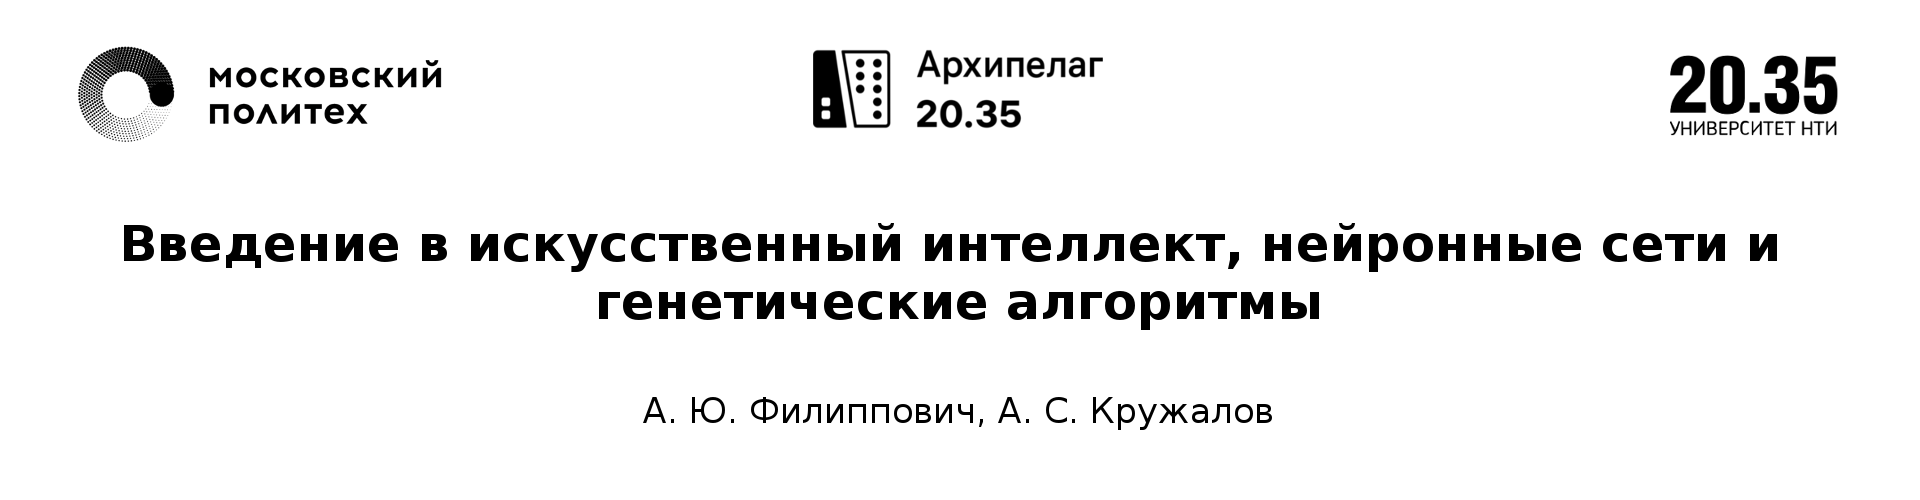

# **Однослойный персептрон и логистическая регрессия**

<a href="mailto:alexkruzhalov@gmail.com">Кружалов А. С.</a> | Leader-ID: `#955144#`

**12 ноября 2020 г.**

##Раздел 1. Распознавание рукописных цифр при помощи однослойного персептрона

В данном разделе вам предстоит обучить однослойный персептрон распознавать рукописные цифры из набора данных MNIST.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_images(images, titles, columns=5, rows=1, fontsize=20):
    fig=plt.figure(figsize=(20, 10))
    for i, img in enumerate(images[:columns*rows]):
        fig.add_subplot(rows, columns, i + 1)
        plt.axis('off')
        plt.title(titles[i], fontsize=fontsize)
        plt.imshow(img, cmap='gray')
    plt.show()

In [ ]:
(X_train_original, y_train), (X_test_original, y_test) = mnist.load_data()
print(X_train_original.shape, X_test_original.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


Выведите первые 5 изображений из обучающей выборки с помощью функции `plot_images`.

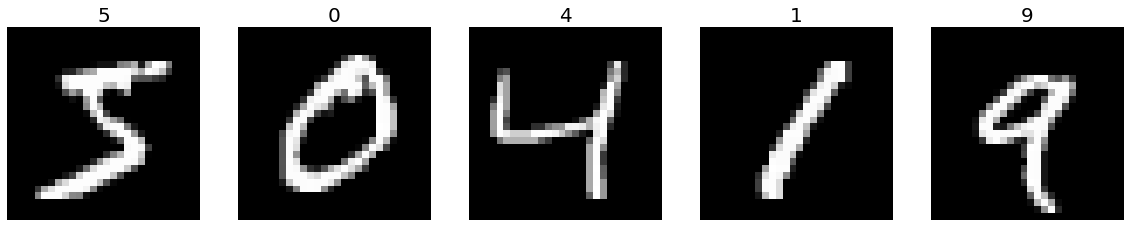

In [ ]:
plot_images(X_train_original, y_train)

Закодируйте метки классов в виде векторов с помощью one-hot encoding.

*Подсказка: для решения этой задачи удобно использовать функцию `np.eye`.*

In [ ]:
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

Выполните предобработку данных изображений, чтобы значение каждого пикселя принадлежало множеству $\{0, 1\}$.

In [ ]:
X_train = np.array(X_train_original/255 > 0.5, dtype=np.int16)
X_test = np.array(X_test_original/255 > 0.5, dtype=np.int16)

Выведите первые 5 изображений из обучающей выборки после процедуры предобработки.

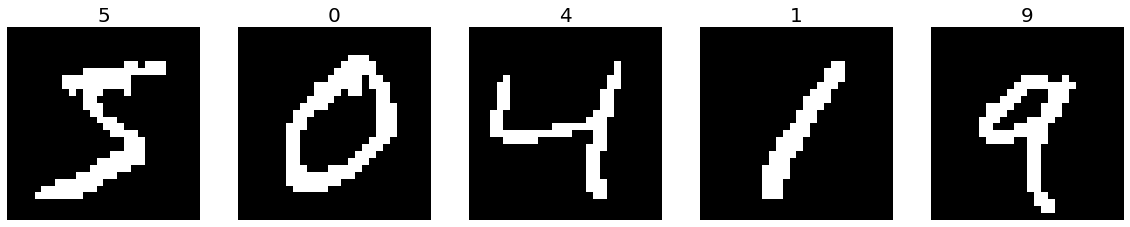

In [ ]:
plot_images(X_train, y_train)

Ниже представлена заготовка класса персептрона. Реализуйте недостающие части.

In [ ]:
class Perceptron:
    def __init__(self, m, k, learning_rate=0.001, num_epochs=20, verbose=False):
        self.m = m # number of features
        self.k = k # number of classes (neurons)
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.verbose = verbose
        self._validation_freq = 1
        self._init_params()
    
    # Initialize weights and biases
    def _init_params(self):
        self.w = np.random.normal(0.0, 0.1, (self.m, self.k))
        self.b = np.random.normal(0.0, 0.1, (1, self.k))
        
    # Heaviside step function
    def _activate(self, x):
        # Можно попробовать использовать сигмоиду
        return 1/(1 + np.exp(-x))
        # return np.array(x > 0, dtype=np.int16)
    
    # Forward pass
    def predict(self, X):
        return self._activate(X @ self.w + self.b)
    
    # Use delta rule to update parameters
    def _update_params(self, x, y, y_pred):
        e = y - y_pred
        delta_w = self.learning_rate*(x.reshape(-1, 1) @ e.reshape(1, -1))
        self.w += delta_w
        self.b += self.learning_rate*e
        
        
    def fit(self, X, y, X_test=None, y_test=None):
        for i in range(self.num_epochs):
            for j in range(X.shape[0]):
                # Compute prediction for X[j]
                y_pred = self.predict(X[j].reshape(1, -1))
                # Update params
                self._update_params(X[j], y[j], y_pred)
                
            if X_test is not None and y_test is not None and self.verbose and (i + 1) % self._validation_freq == 0:
                # Compute predictions for test set and compute accuracy
                y_test_pred = self.predict(X_test)
                accuracy = (y_test.argmax(axis=1) == y_test_pred.argmax(axis=1)).mean()
                print("Accuracy on {}-th epoch is {:.04f}".format(i+1, accuracy))

Обучите персептрон. Перед подачей изображений на вход персептрону, преобразуйте их в вектора размерности 784.

*Подсказка: для изменения формы массива можно воспользоваться методом `reshape`.*

In [ ]:
perceptron = Perceptron(784, 10, verbose=True)
perceptron.fit(X_train.reshape(-1, 784), y_train_one_hot, X_test=X_test.reshape(-1, 784), y_test=y_test_one_hot)

Accuracy on 1-th epoch is 0.8817
Accuracy on 2-th epoch is 0.8955
Accuracy on 3-th epoch is 0.8998
Accuracy on 4-th epoch is 0.9030
Accuracy on 5-th epoch is 0.9051
Accuracy on 6-th epoch is 0.9072
Accuracy on 7-th epoch is 0.9081
Accuracy on 8-th epoch is 0.9089
Accuracy on 9-th epoch is 0.9095
Accuracy on 10-th epoch is 0.9095
Accuracy on 11-th epoch is 0.9095
Accuracy on 12-th epoch is 0.9098
Accuracy on 13-th epoch is 0.9106
Accuracy on 14-th epoch is 0.9106
Accuracy on 15-th epoch is 0.9112
Accuracy on 16-th epoch is 0.9114
Accuracy on 17-th epoch is 0.9117
Accuracy on 18-th epoch is 0.9120
Accuracy on 19-th epoch is 0.9118
Accuracy on 20-th epoch is 0.9117


Вычислите предсказания для тестовой выборки.

*Подсказка: чтобы из one-hot encoding вернуться к десятичным цифрам, можно воспользоваться методом `argmax`.*

In [ ]:
y_test_pred = perceptron.predict(X_test.reshape(-1, 784)).argmax(axis=1)

Выведите первые пять изображений из тестовой выборки. В качестве заголовка к каждому изображению выведите ожидаемую (англ. expected) и предсказанную (англ. predicted) метки класса.

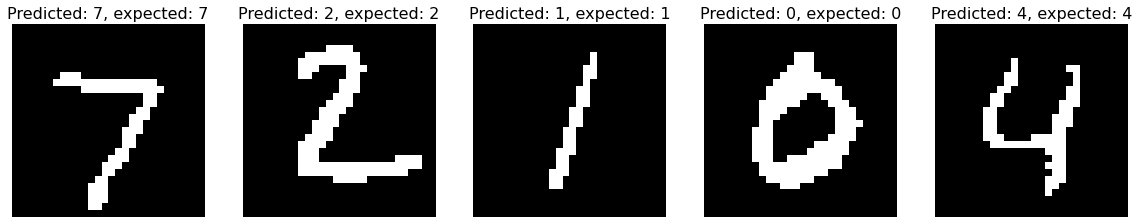

In [ ]:
columns = 5
rows = 1
titles = ["Predicted: {}, expected: {}".format(y_test_pred[i], y_test[i]) for i in range(columns*rows)]
plot_images(X_test, titles, columns=columns, rows=rows, fontsize=16)

Выведите несколько изображений из тестовой выборки, в которых персептрон допустил ошибку. В качестве заголовка к каждому изображению выведите ожидаемую (англ. expected) и предсказанную (англ. predicted) метки класса. Как вы считаете, есть ли в допущенных ошибках какая-то закономерность?


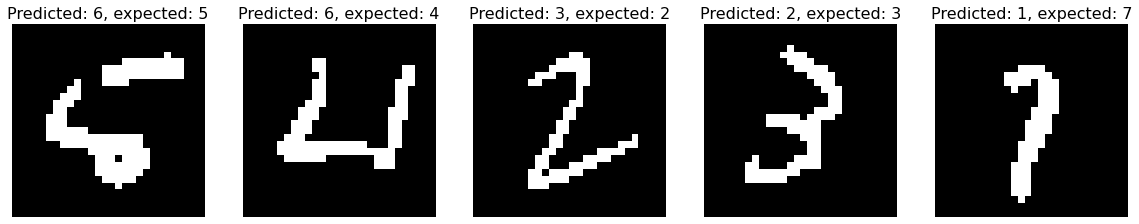

In [ ]:
columns = 5
rows = 1
e_mask = y_test_pred != y_test # mask of errors
titles = ["Predicted: {}, expected: {}".format(y_test_pred[e_mask][i], y_test[e_mask][i]) for i in range(columns*rows)]
plot_images(X_test[e_mask], titles, columns=columns, rows=rows, fontsize=16)

**Ответ:**

Изобразите веса нейронов в виде изображений. У вас должно получиться 10 изображений. Можно ли по полученным изображениям сделать вывод, за распознавание какой цифры отвечает каждый из нейронов?

*Подсказка: можете посмотреть [пример](https://ml4a.github.io/ml4a/looking_inside_neural_nets/).*

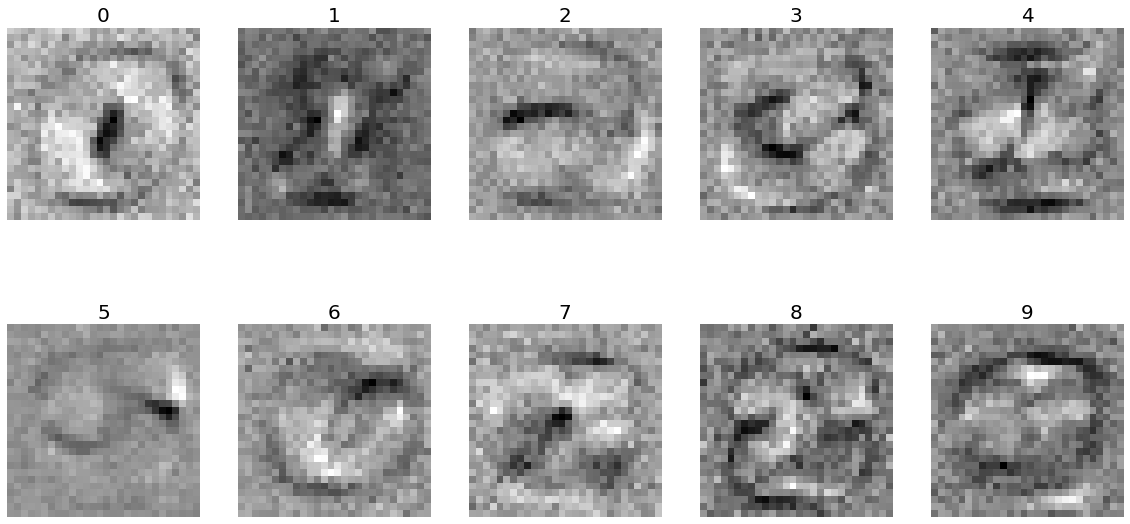

In [ ]:
weights_images = perceptron.w.T.reshape(-1, 28, 28) 
titles = [i for i in range(weights_images.shape[0])]
plot_images(weights_images, titles, columns=5, rows=2)

**Ответ:**

Постройте матрицу ошибок (англ. confusion matrix) для полученной нейронной сети. 

Подсказка: можно воспользоваться функцией [`sklearn.metrics.confusion_matrix`](https://scikit-learn.org/0.16/modules/generated/sklearn.metrics.confusion_matrix.html). [Пример матрицы ошибок.](https://ml4a.github.io/demos/confusion_mnist/)

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
# Normalize confusion matrix:
cm = cm/cm.sum(axis=1).reshape(-1, 1)

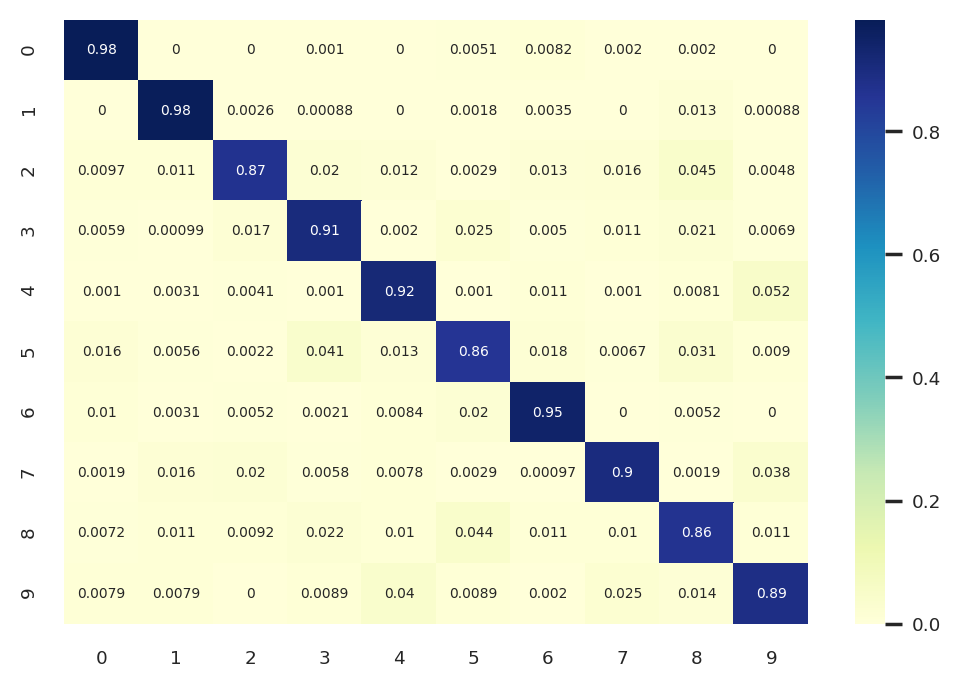

In [ ]:
plt.figure(dpi=200)
sns.set(font_scale=0.6)
g = sns.heatmap(cm, annot=True, annot_kws={"size": 5}, cmap="YlGnBu")
plt.show()

По матрице ошибок определите, с какой цифрой нейронная сеть чаще всего путает цифру 3.

**Ответ:**

### Полезные материалы
1. [Looking inside neural nets](https://ml4a.github.io/ml4a/looking_inside_neural_nets/)
2. [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)

##Раздел 2. Логистическая регрессия


Данный раздел состоит из двух частей. В первой части вам нужно реализовать логистическую регрессию и проверить, как она работает на синтетических данных. Во второй части вам нужно применить логистическую регрессию для решения задачи на реальных данных.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline
np.random.seed(7)

### Логистическая регрессия на синтетических данных

Для генерации синтетических данных для задачи бинарной классификации можно воспользоваться функцией [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html). Сгенерируем данные с двумя признаками (факторами), чтобы их было удобно изобразить на плоскости.

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=9)

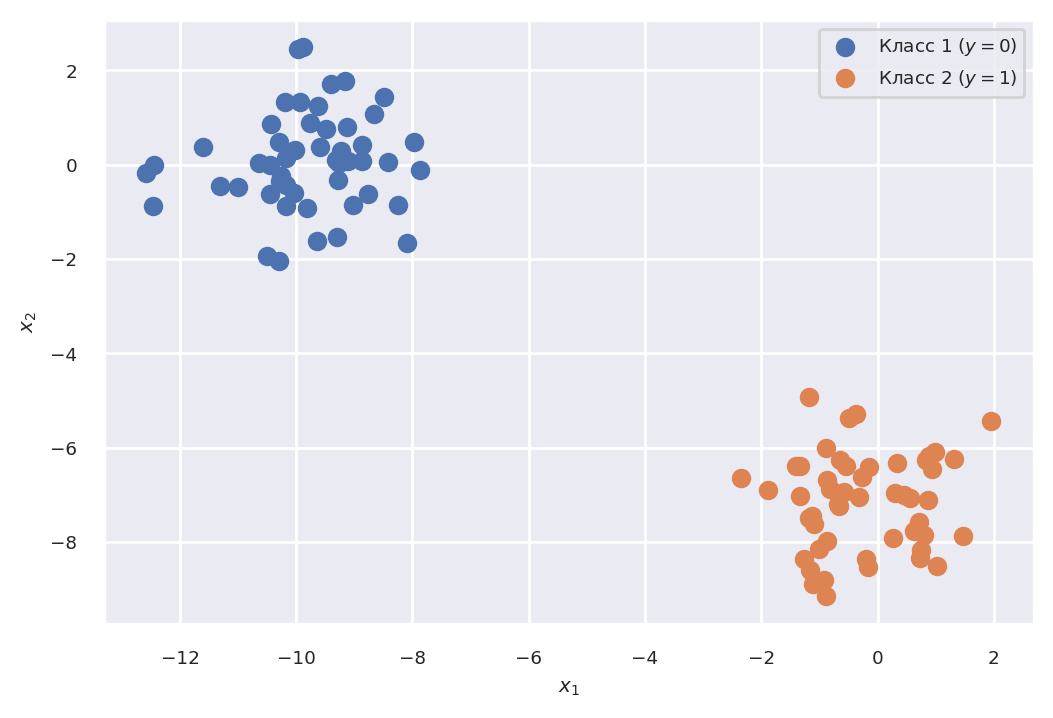

In [ ]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Класс 1 ($y = 0$)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Класс 2 ($y = 1$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

Ниже представлена заготовка класса логистической регрессии. Реализуйте недостающие части.

In [ ]:
class LogisticRegression:
    
    def __init__(self, learning_rate=0.1, max_iter=1000, verbose=False):
        # Learning rate for gradient descent
        self._lr = learning_rate
        # Maximum number of iterations for gradient descent
        self._max_iter = max_iter
        # Show verbose history
        self.verbose = verbose
        # How often to print validation info
        self._validation_freq = 50
        
        
    def fit(self, X, y):
        losses = []
        # Add extra dummy feature (x[-1] = 1) for bias
        X = self._add_intercept(X)
        y = y.reshape(-1, 1)
        n_objects, n_features = X.shape
        self._weights = np.random.normal(size=(n_features, 1), scale=0.1)
        
        # Iterative gradient descent
        for i in range(self._max_iter):
            # Compute probabilities, gradient, and update weights
            p = self._sigmoid(self._logit(X))
            grad = 1/len(X)*(X.T @ (p - y))
            self._weights = self._weights - self._lr*grad
            
            
            # Compute probabilities after weights update
            p = self._sigmoid(self._logit(X))
            
            # Clip values for numeric stability in logarithm
            p = np.clip(p, 1e-10, 1 - 1e-10)
            
            # Compute Negative log-likelihood loss 
            loss = self._loss(y, p)
            losses.append(loss)

            # Compute accuracy
            acc = np.mean((p >= 0.5) == y)
                
            if self.verbose and i % self._validation_freq == 0:
                print("Iteration {}: Loss = {}. Accuracy = {}".format(i, loss, acc))

        return losses

        
    def predict(self, X, threshold=0.5):
        # Predict class labels for samples in X.
        X = self._add_intercept(X)
        return np.array(self._sigmoid(self._logit(X)) >= threshold, dtype=np.int16)
    
    
    def predict_proba(self, X):
        # Probability estimates.
        X = self._add_intercept(X)
        return self._sigmoid(self._logit(X))
    
    
    def _add_intercept(self, X):
        return np.hstack([X, np.ones((len(X), 1))])
    
    def _loss(self, y, p):
        # Compute negative log-likelihood loss
        return -np.mean(y*np.log(p) + (1 - y)*np.log(1 - p))

    def _sigmoid(self, v):
        return 1/(1 + np.exp(-v))

    def _logit(self, x):
        return x @ self._weights

Обучите модель на сгенерированных ранее данных.

In [ ]:
clf = LogisticRegression(learning_rate=0.1, max_iter=100, verbose=True)
losses = clf.fit(X, y)

Iteration 0: Loss = 0.12546058036567018. Accuracy = 1.0
Iteration 50: Loss = 0.007467970212558784. Accuracy = 1.0


Постройте график, показывающий зависимость значения функции потерь от номера итерации.

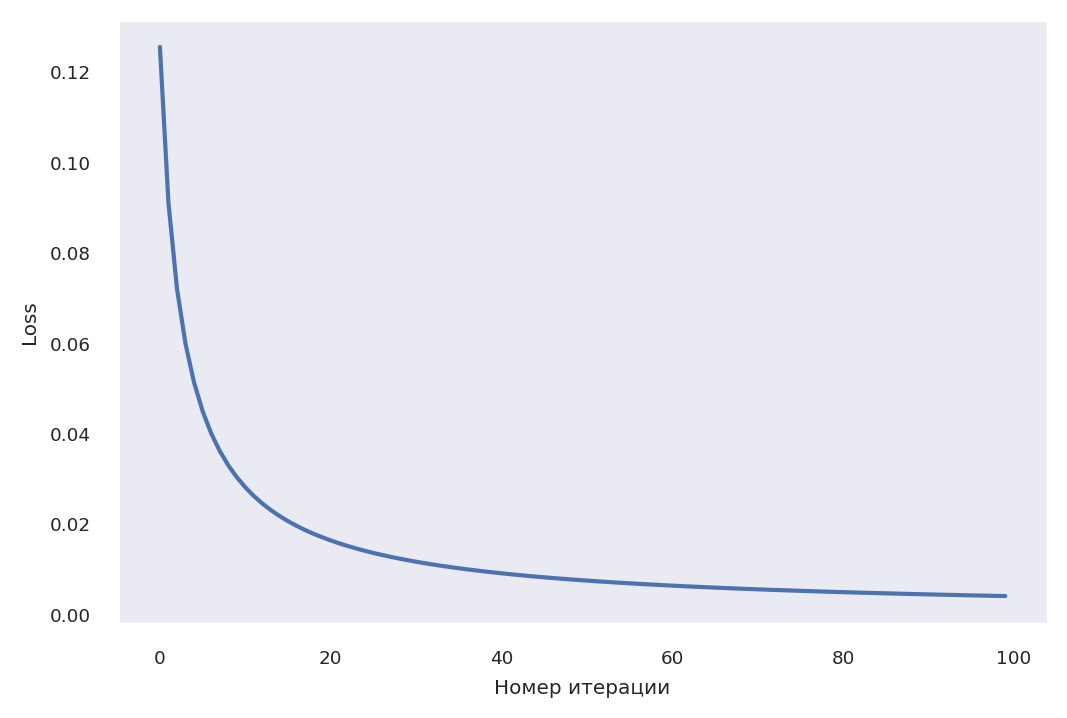

In [ ]:
fig = plt.figure(dpi=200)
plt.grid()
plt.plot(losses)
plt.xlabel('Номер итерации')
plt.ylabel('Loss')
plt.show()

Постройте график, показывающей форму границы решения (англ. decision boundary).

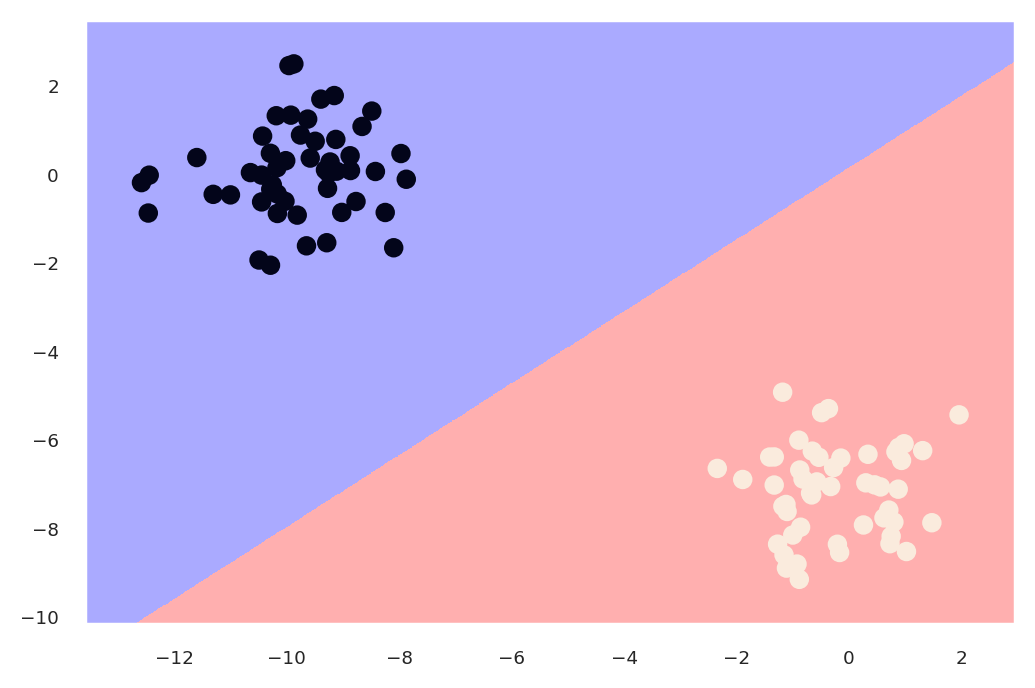

In [ ]:
fig = plt.figure(dpi=200)
xx, yy = np.meshgrid(np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000), np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000))
pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)
plt.pcolormesh(xx, yy, pred, cmap=ListedColormap(['#AAAAFF','#FFAFAF']))
plt.grid()
plt.scatter(X[:,0], X[:,1], c=y)

plt.show()

Выпишите уравнение границы решения. 

**Ответ:**

Постройте график получившейся прямой на диаграмме рассеяния.

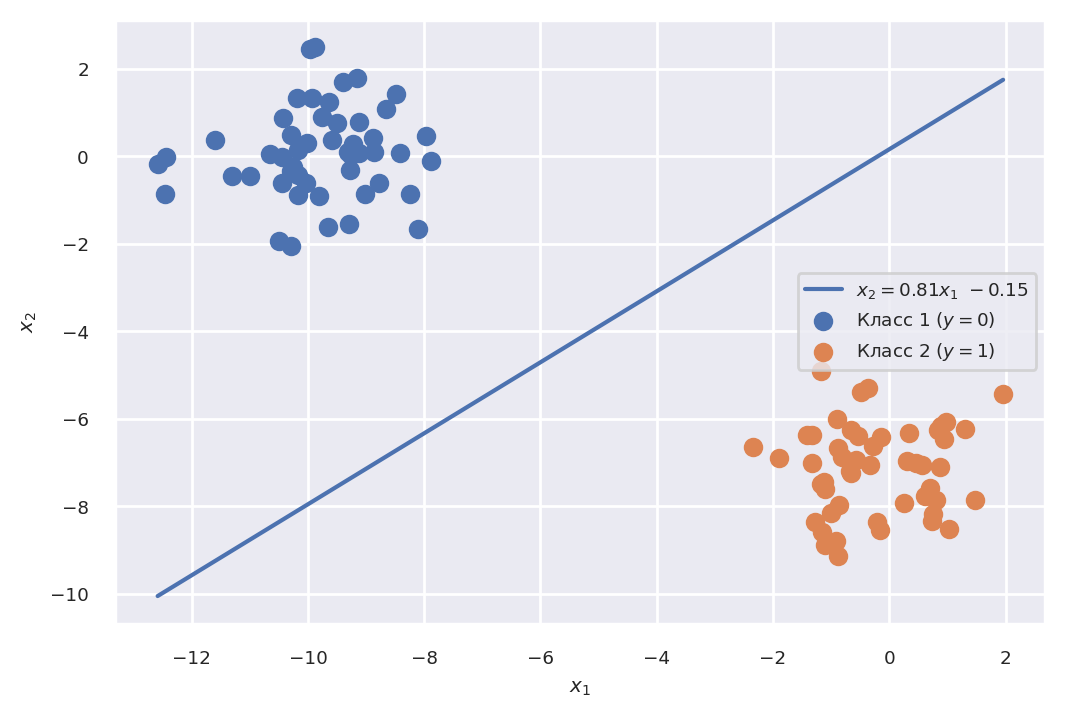

In [ ]:
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Класс 1 ($y = 0$)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Класс 2 ($y = 1$)')
a, b, c = clf._weights.squeeze()
xx = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
yy = -a/b*xx - c/b
plt.plot(xx, yy, label=f'$x_2 = {-a/b:.2f} x_1 \ {"+" if c/b > 0 else ""} {c/b:.2f}$')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

Постройте ROC-кривую для получившейся модели. Вычислите значение AUC.

In [ ]:
def plot_roc_auc(fpr, tpr, roc_auc):
    plt.figure(dpi=200)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

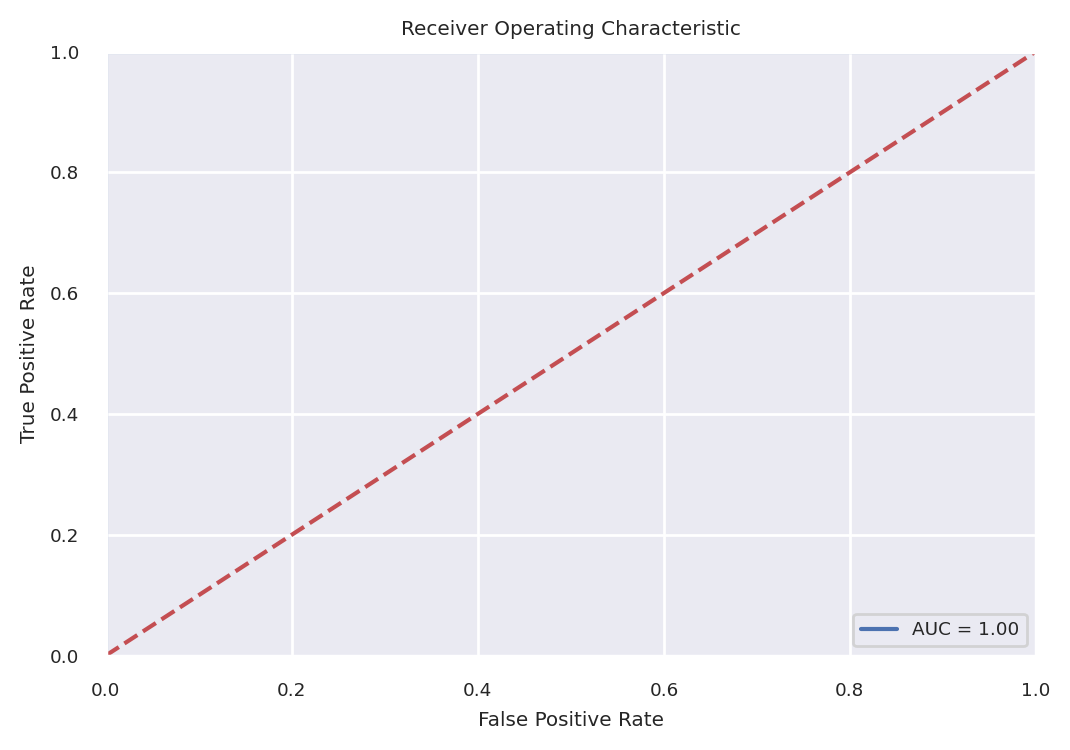

In [ ]:
probs = clf.predict_proba(X)
fpr, tpr, threshold = metrics.roc_curve(y, probs)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_auc(fpr, tpr, roc_auc)

Как можно объяснить полученный вид кривой и значение AUC?

**Ответ:**

Постройте диаграмму рассеяния и обучите модель логистической регресси для данных, сгенерированных ниже.

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=[[1, 2], [2, 3]])

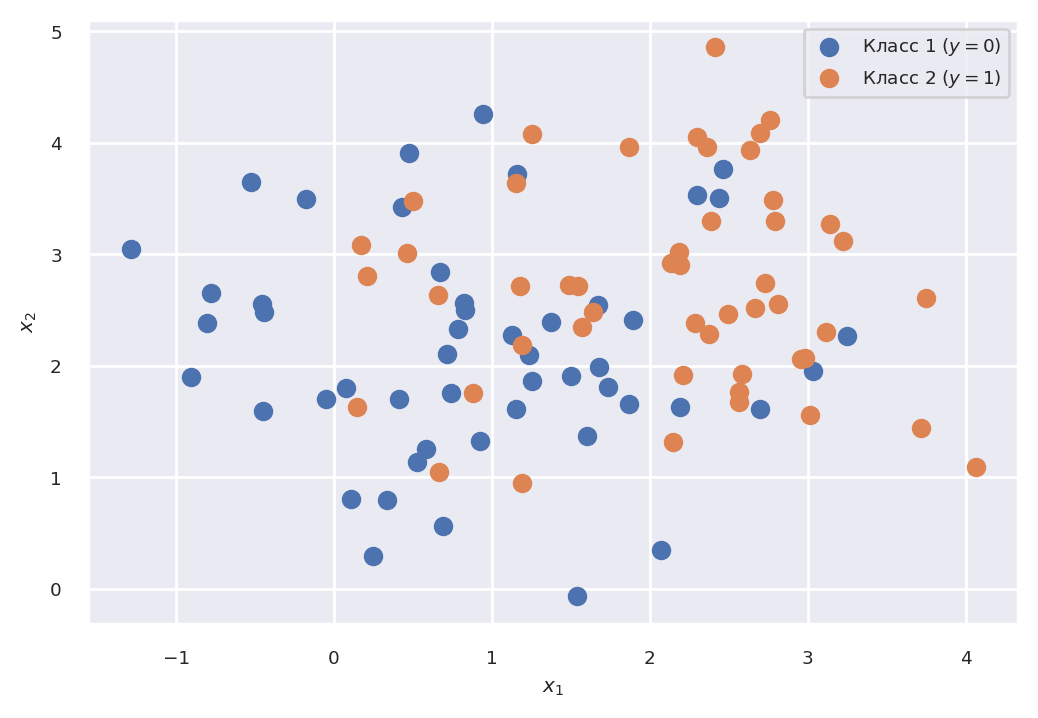

In [ ]:
X, y = make_blobs(n_samples=100, n_features=2, centers=[[1, 2], [2, 3]])
plt.figure(dpi=200)
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Класс 1 ($y = 0$)')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Класс 2 ($y = 1$)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

In [ ]:
clf = LogisticRegression(max_iter=200, verbose=False)
losses = clf.fit(X, y)

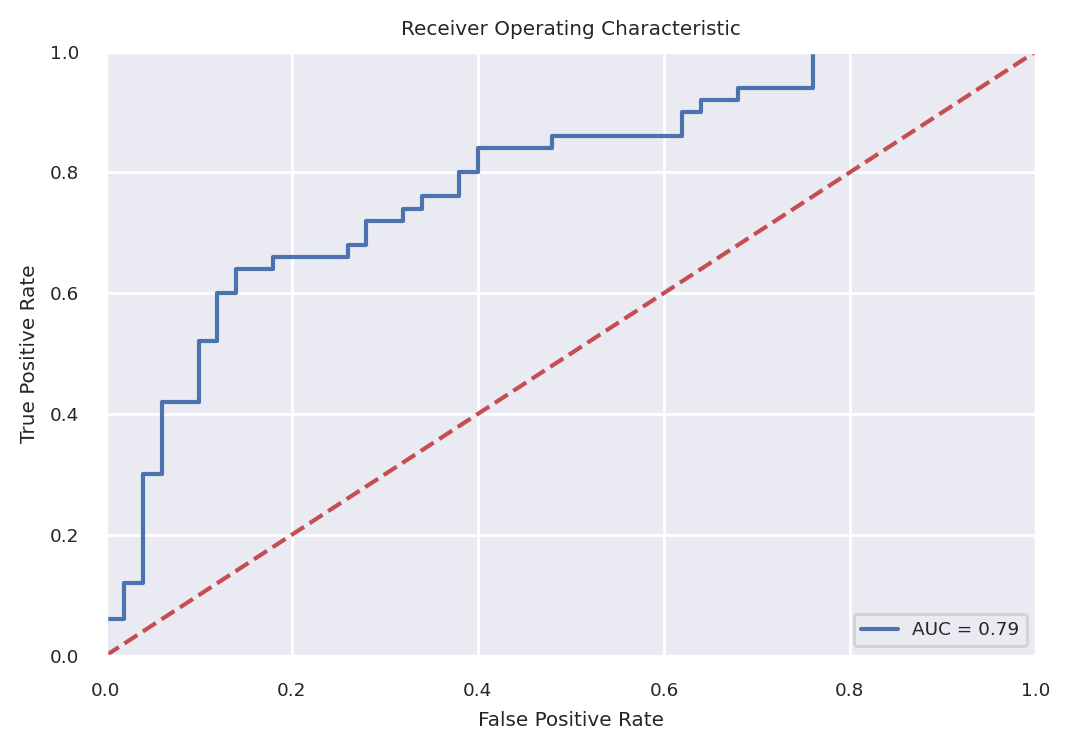

In [ ]:
preds = clf.predict_proba(X)
fpr, tpr, threshold = metrics.roc_curve(y, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_auc(fpr, tpr, roc_auc)

### Логистическая регрессия на реальных данных

Во второй части вам нужно построить модель логистической регрессии, позволяющую предсказать, есть ли у пациента диабет II типа, по набору результатов обследований. Для построения модели предлагается использовать данные [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database), которые содержат данные обследований 768 пациенток индийской народности Пима. В данных содержатся следующие показатели.


1. Число беременностей (Pregnancies).
2. Концентрация глюкозы в плазме через 2 часа после введения в пероральном глюкозотолерантном тесте (Glucose).
3. Диастолическое артериальное давление [мм рт. ст.] (BloodPressure).
4. Толщина кожной складки в районе трицепса [мм] (SkinThickness).
5. Концентрация инсулина в сыворотке крови [мкЕд/мл] (Insulin).
6. Индекс массы тела [вес в кг/(рост в м)^2] (BMI).
7. Функция, описывающая генетическую предрасположенность к диабету (DiabetesPedigreeFunction).
8. Возраст [годы] (Age).

Outcome -- страдает ли пациент сахарным диабетом. Если страдает Outcome = 1, в противном случае Outcome = 0.



In [ ]:
df = pd.read_csv('http://edu.std-900.ist.mospolytech.ru/files/diabetes.csv')
print(df.shape)

(768, 9)


In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Разделите данные на обучающую и тестовую выборки в пропорции 70% на 30% соответственно с помощью функции [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Обратите внимание на параметр `stratify`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values, df.iloc[:,-1].values, test_size=0.3, stratify=df.iloc[:,-1].values)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


Проведите [стандартизацию](https://wiki.loginom.ru/articles/data-standartization.html) данных, чтобы привести признаки к одному масштабу. В дальнейшем это позволит сравнивать коэффициенты регрессии при разных признаках.

*Подсказка: среднее значение и стандартное отклонение нужно вычислять по обучающей выборке.*

In [ ]:
mean = X_train.mean(axis=0)
std = X_train.mean(axis=0)
X_train_normalized = (X_train - mean)/std
X_test_normalized = (X_test - mean)/std

Обучите на подготовленных данных модель логистической регрессии. Экспериментальным путём подберите оптимальное значение `learning_rate`.

In [ ]:
clf = LogisticRegression(learning_rate=0.2, max_iter=1000, verbose=False)
losses = clf.fit(X_train_normalized, y_train)

Постройте график, показывающий зависимость значения функции потерь от номера итерации.

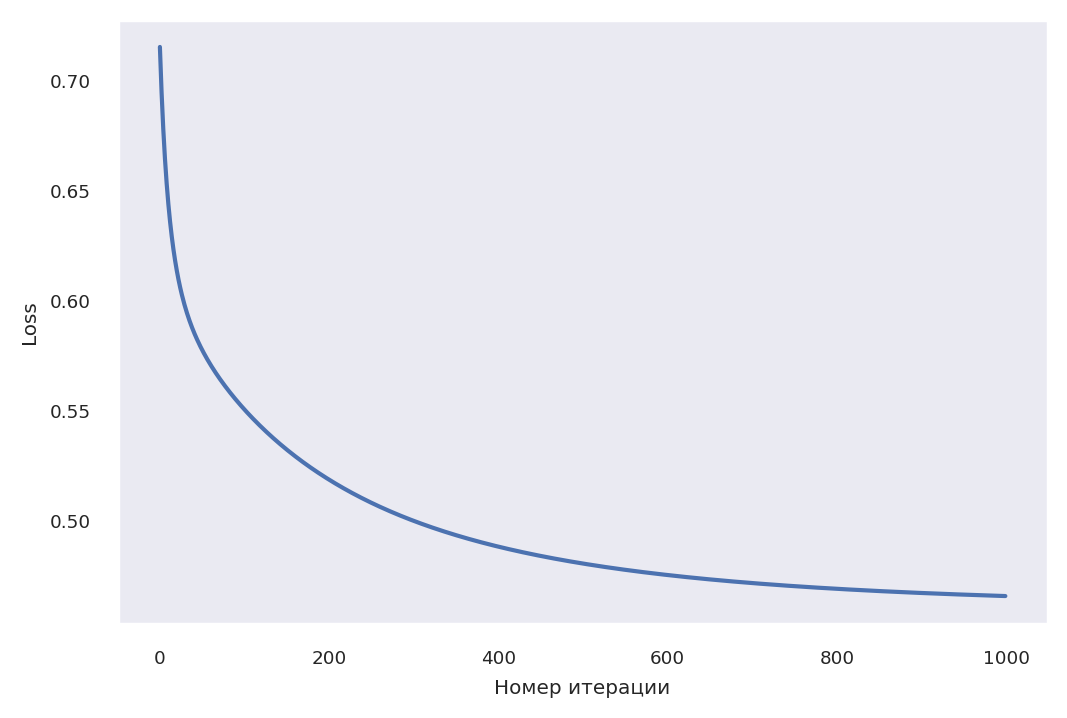

In [ ]:
fig = plt.figure(dpi=200)
plt.grid()
plt.plot(losses)
plt.xlabel('Номер итерации')
plt.ylabel('Loss')
plt.show()

Вычислите значения accuracy, precision, recall для тестовой выборки. Можно воспользоваться функциями `accuracy_score`, `precision_score`, `recall_score` модуля [`sklearn.metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score).

In [ ]:
predicted = clf.predict(X_test_normalized)
print(f'Accuracy:  {metrics.accuracy_score(y_test, predicted):.2f}')
print(f'Precision: {metrics.precision_score(y_test, predicted):.2f}')
print(f'Recall:    {metrics.recall_score(y_test, predicted):.2f}')

Accuracy:  0.76
Precision: 0.69
Recall:    0.58


Постройте ROC-кривую и вычислите значение AUC.

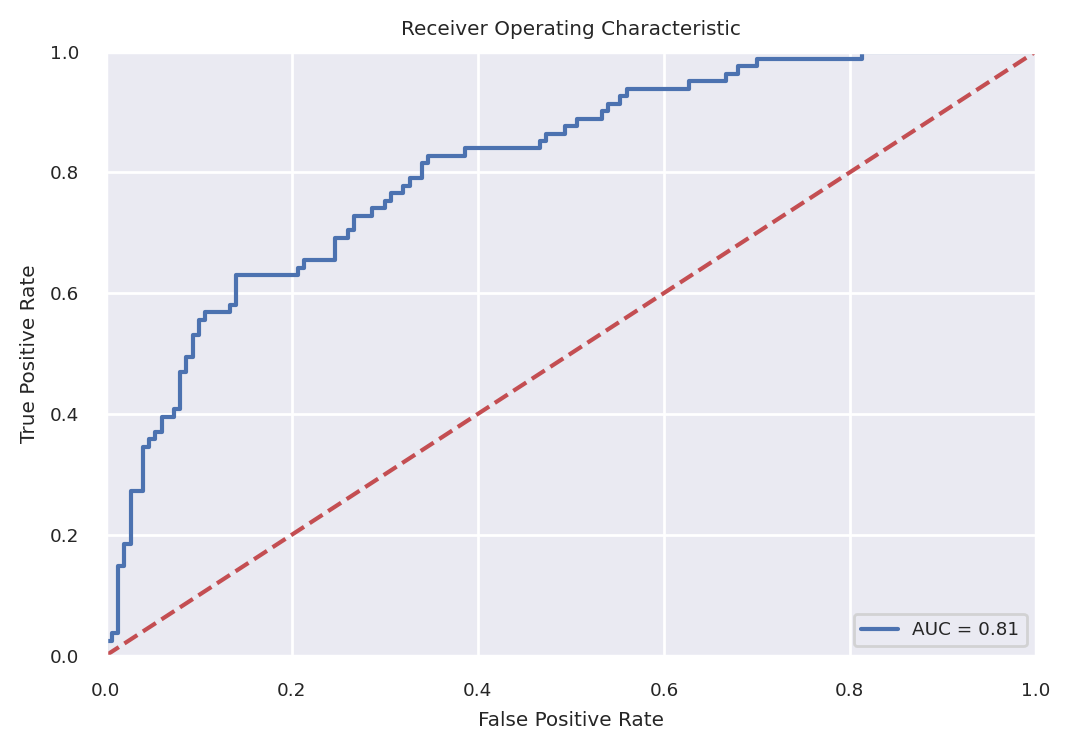

In [ ]:
preds = clf.predict_proba(X_test_normalized)
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
plot_roc_auc(fpr, tpr, roc_auc)

Для диагностических тестов используются такие показатели как чувствительность (англ. sensitivity) -- вероятность того, что тест
окажется позитивным при наличии признака $\left (\frac{TP}{TP+FN} \right )$, и специфичность (англ. specificity) -- вероятность того, что тест окажется негативным при отсутствии признака $\left (\frac{TN}{TN+FP} \right )$. Вычислите [чувствительность и специфичность](https://ru.wikipedia.org/wiki/%D0%A7%D1%83%D0%B2%D1%81%D1%82%D0%B2%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%B8_%D1%81%D0%BF%D0%B5%D1%86%D0%B8%D1%84%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C) для обученной логистической регрессии. 

In [58]:
probs = clf.predict(X_test_normalized).squeeze()
t = 0.5 # threshold
tp = np.sum((probs > t)[y_test == 1])
fp = np.sum((probs > t)[y_test == 0])
tn = np.sum(((probs > t) == False)[y_test == 0])
fn = np.sum(((probs > t) == False)[y_test == 1])

print(f'Чувствительность: {tp/(tp+fn):.2f}')
print(f'Специфичность: {tn/(tn+fp):.2f}')

Чувствительность: 0.58
Специфичность: 0.86


Выведите полученные значения коэффициентов регрессии для каждого признака.

In [ ]:
for f, w in zip(df.columns[:-1], clf._weights[:-1].squeeze()):
  print(f'{f:30}\t{w:.5f}')

Pregnancies                   	0.40717
Glucose                       	3.43101
BloodPressure                 	-1.21258
SkinThickness                 	0.07067
Insulin                       	-0.02981
BMI                           	2.22240
DiabetesPedigreeFunction      	0.40704
Age                           	0.87930


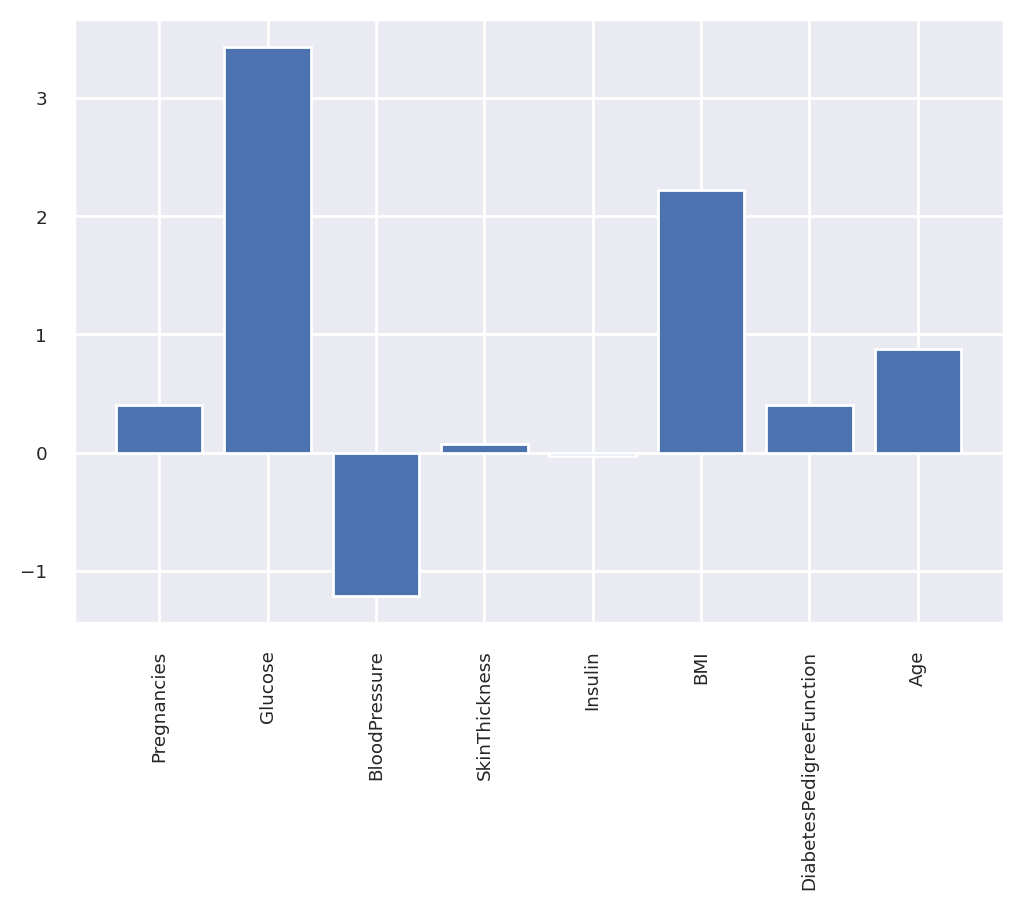

In [ ]:
fig = plt.figure(dpi=200)
plt.bar(df.columns[:-1],clf._weights[:-1].squeeze())
plt.xticks(rotation=90)
plt.show()

На основе анализа полученных данных определите, какие признаки являются наиболее значимыми (информативными) для диагностирования у пациента диабета II типа.

**Ответ:**

### Полезные материалы
1. [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)